# 5.3.6 PowerTransformer

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings("ignore")

Aplica transformaciones de potencias para llevar la distribución de los datos a una que sea lo más cercana posible a una distribución normal.

Implementa una familia de transformaciones monotónicas paramétricas.

Es útil para datos heterocedásticos o en situaciones donde la normalidad es deseada.

**Transformación de Yeo-Johnson**

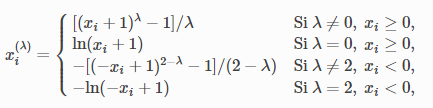

Admite datos positivos y negativos.

**Transformación de Box-Cox**

$$ x_i^{(\lambda)} = \frac{x_i^{(\lambda)} - 1}{\lambda}, si \ \lambda \not= 0 $$

$$ x_i^{(\lambda)} = ln(x_i), si \ \lambda = 0 $$

Requiere datos estrictamente positivos.

In [ ]:
penguins = sns.load_dataset("penguins")

data = penguins[["flipper_length_mm"]]
data = data.rename(columns={"flipper_length_mm": "original"})

In [ ]:
powerTransformer_boxcox = PowerTransformer(
    # -------------------------------------------------------------------------
    # The power transform method. 'box-cox' / 'yeo-johnson'
    method="box-cox",
    # -------------------------------------------------------------------------
    # Set to True to apply zero-mean, unit-variance normalization to the
    # transformed output.
    standardize=True,
)
powerTransformer_boxcox.fit(data[["original"]])

data["box-cox"] = powerTransformer_boxcox.transform(data[["original"]])

In [ ]:
powerTransformer_yeojohnson = PowerTransformer(
    method="yeo-johnson",
    standardize=True,
)
powerTransformer_yeojohnson.fit(data[["original"]])

data["yeo-johnson"] = powerTransformer_yeojohnson.transform(data[["original"]])

In [ ]:
g = sns.jointplot(x="original", y="box-cox", data=data, kind="scatter")
g.fig.set_figwidth(3)
g.fig.set_figheight(3)

In [ ]:
g = sns.jointplot(x="original", y="yeo-johnson", data=data, kind="scatter")
g.fig.set_figwidth(3)
g.fig.set_figheight(3)

In [ ]:
display(
    powerTransformer_boxcox.lambdas_,
    powerTransformer_yeojohnson.lambdas_,
)

In [ ]:
print('ok_')